In [233]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

$$ \text{Average:    } TD_{c_1 \cup c_2} = \sum_{x \ in c_1 \cup c_2}D(x,\mu_{c_1 \cup c_2})^2$$

$$ \text{Ward's Method:    } D(c_1,c_2) = \frac{1}{|c_1|}\frac{1}{|c_2|}\sum_{x_1 \in c_1}\sum_{x_2 \in c_2} D(x_1,x_2)$$

In [234]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

#PAST DJIA
custom_tickers = [
    "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
    "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
    "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
    "CCEP"
    #"CRJ", "H", "BOA",
]


# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

# for i in custom_tickers:
#     print(i)
#     plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
#     plt.show()

Stock data for PG:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.675781  1.761719  1.675781  1.703125  0.378553  1760000     PG
1970-03-26  1.703125  1.714844  1.695313  1.703125  0.378553   422400     PG
1970-03-30  1.687500  1.687500  1.660156  1.683594  0.374212   531200     PG
1970-03-31  1.683594  1.703125  1.681641  1.703125  0.378553   243200     PG
1970-04-01  1.718750  1.734375  1.718750  1.726563  0.383762   806400     PG


Stock data for JNJ:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.062500  1.100694  1.062500  1.086806  0.337554  2275200    JNJ
1970-03-26  1.086806  1.093750  1.083333  1.086806  0.337554   936000    JNJ
1970-03-30  1.086806  1.092014  1.079861  1.081597  0.335936  1368000    JNJ
1970-03-31  1.076389  1.076389  1.065972  1.072917  0.333240   676800    JNJ
1970-04-01  1.069444  1.069444  1.062500  1.065104  0.330814   820800    JNJ


Stock data for XOM:
             

/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

In [235]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_60996/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

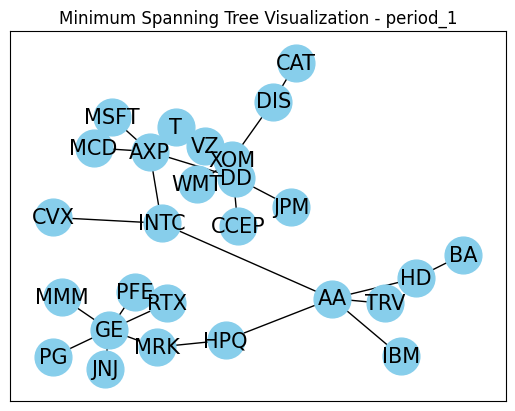

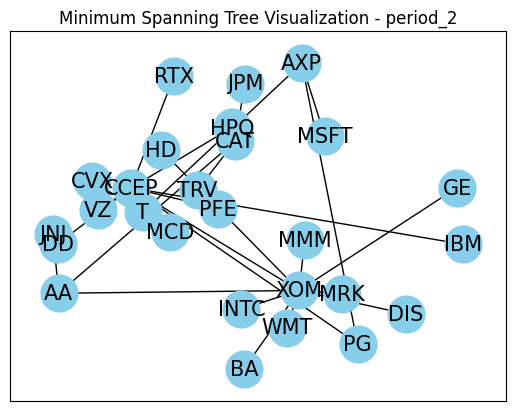

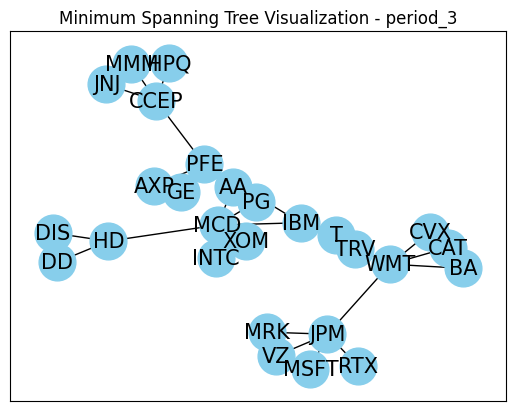

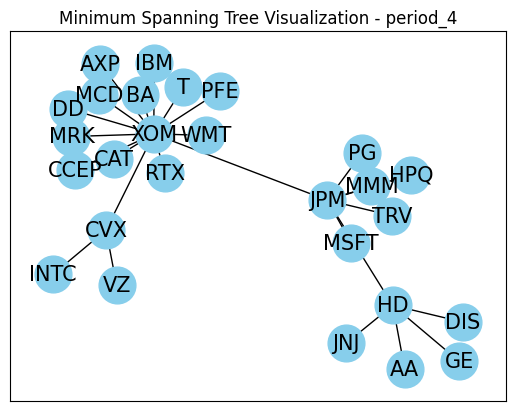

In [236]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    distance_matrix = correlation_matrices[period]
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, edge_color='k')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree Visualization - {period}")
    plt.show()


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


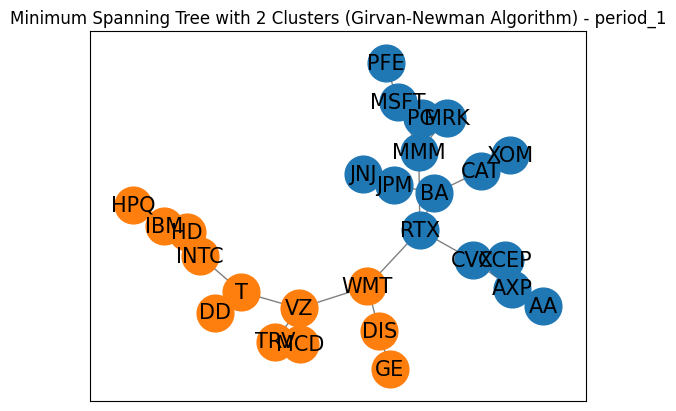

Metrics for period_1:
Cluster 1: Average Return = 0.0013, Standard Deviation = 0.0286, Sharpe Ratio = 0.0456
Cluster 2: Average Return = -0.0001, Standard Deviation = 0.0319, Sharpe Ratio = -0.0028
[('AA', 'DD'), ('AA', 'DIS'), ('AA', 'GE'), ('AA', 'HD'), ('AA', 'HPQ'), ('AA', 'IBM'), ('AA', 'INTC'), ('AA', 'MCD'), ('AA', 'T'), ('AA', 'TRV'), ('AA', 'VZ'), ('AA', 'WMT'), ('AXP', 'DD'), ('AXP', 'DIS'), ('AXP', 'GE'), ('AXP', 'HD'), ('AXP', 'HPQ'), ('AXP', 'IBM'), ('AXP', 'INTC'), ('AXP', 'MCD'), ('AXP', 'T'), ('AXP', 'TRV'), ('AXP', 'VZ'), ('AXP', 'WMT'), ('BA', 'DD'), ('BA', 'DIS'), ('BA', 'GE'), ('BA', 'HD'), ('BA', 'HPQ'), ('BA', 'IBM'), ('BA', 'INTC'), ('BA', 'MCD'), ('BA', 'T'), ('BA', 'TRV'), ('BA', 'VZ'), ('BA', 'WMT'), ('CAT', 'DD'), ('CAT', 'DIS'), ('CAT', 'GE'), ('CAT', 'HD'), ('CAT', 'HPQ'), ('CAT', 'IBM'), ('CAT', 'INTC'), ('CAT', 'MCD'), ('CAT', 'T'), ('CAT', 'TRV'), ('CAT', 'VZ'), ('CAT', 'WMT'), ('CCEP', 'DD'), ('CCEP', 'DIS'), ('CCEP', 'GE'), ('CCEP', 'HD'), ('CCEP', 'HP

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


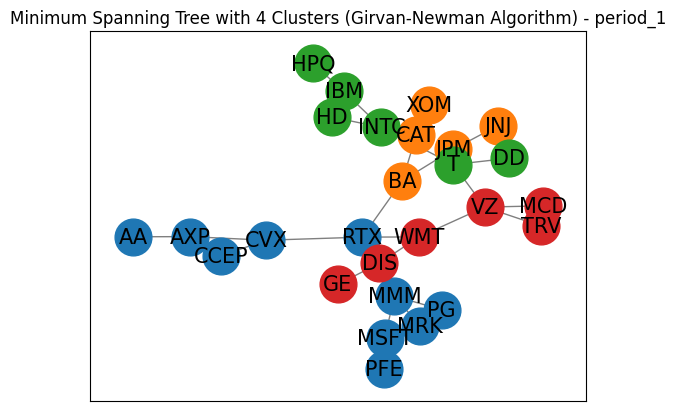

Metrics for period_1:
Cluster 1: Average Return = 0.0014, Standard Deviation = 0.0282, Sharpe Ratio = 0.0497
Cluster 2: Average Return = 0.0011, Standard Deviation = 0.0324, Sharpe Ratio = 0.0345
Cluster 3: Average Return = 0.0005, Standard Deviation = 0.0376, Sharpe Ratio = 0.0129
Cluster 4: Average Return = -0.0007, Standard Deviation = 0.0301, Sharpe Ratio = -0.0221
[('AA', 'BA', 'DD', 'DIS'), ('AA', 'BA', 'DD', 'GE'), ('AA', 'BA', 'DD', 'MCD'), ('AA', 'BA', 'DD', 'TRV'), ('AA', 'BA', 'DD', 'VZ'), ('AA', 'BA', 'DD', 'WMT'), ('AA', 'BA', 'HD', 'DIS'), ('AA', 'BA', 'HD', 'GE'), ('AA', 'BA', 'HD', 'MCD'), ('AA', 'BA', 'HD', 'TRV'), ('AA', 'BA', 'HD', 'VZ'), ('AA', 'BA', 'HD', 'WMT'), ('AA', 'BA', 'HPQ', 'DIS'), ('AA', 'BA', 'HPQ', 'GE'), ('AA', 'BA', 'HPQ', 'MCD'), ('AA', 'BA', 'HPQ', 'TRV'), ('AA', 'BA', 'HPQ', 'VZ'), ('AA', 'BA', 'HPQ', 'WMT'), ('AA', 'BA', 'IBM', 'DIS'), ('AA', 'BA', 'IBM', 'GE'), ('AA', 'BA', 'IBM', 'MCD'), ('AA', 'BA', 'IBM', 'TRV'), ('AA', 'BA', 'IBM', 'VZ'), ('A

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


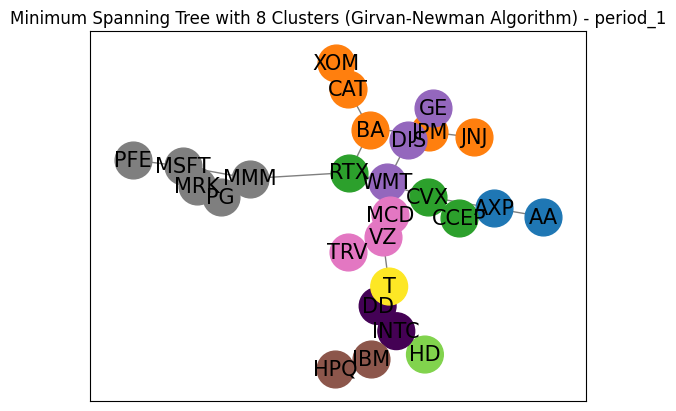

Metrics for period_1:
Cluster 1: Average Return = 0.0016, Standard Deviation = 0.0451, Sharpe Ratio = 0.0351
Cluster 2: Average Return = 0.0011, Standard Deviation = 0.0324, Sharpe Ratio = 0.0345
Cluster 3: Average Return = 0.0021, Standard Deviation = 0.0304, Sharpe Ratio = 0.0693
Cluster 4: Average Return = 0.0003, Standard Deviation = 0.0371, Sharpe Ratio = 0.0085
Cluster 5: Average Return = -0.0005, Standard Deviation = 0.0348, Sharpe Ratio = -0.0139
Cluster 6: Average Return = 0.0008, Standard Deviation = 0.0496, Sharpe Ratio = 0.0167
Cluster 7: Average Return = -0.0008, Standard Deviation = 0.0314, Sharpe Ratio = -0.0269
Cluster 8: Average Return = 0.0009, Standard Deviation = 0.0270, Sharpe Ratio = 0.0332
[('AA', 'BA', 'RTX', 'HD', 'GE', 'HPQ', 'VZ', 'MMM'), ('AA', 'BA', 'RTX', 'HD', 'GE', 'HPQ', 'VZ', 'MRK'), ('AA', 'BA', 'RTX', 'HD', 'GE', 'HPQ', 'VZ', 'MSFT'), ('AA', 'BA', 'RTX', 'HD', 'GE', 'HPQ', 'VZ', 'PFE'), ('AA', 'BA', 'RTX', 'HD', 'GE', 'HPQ', 'VZ', 'PG'), ('AA', 'BA',

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


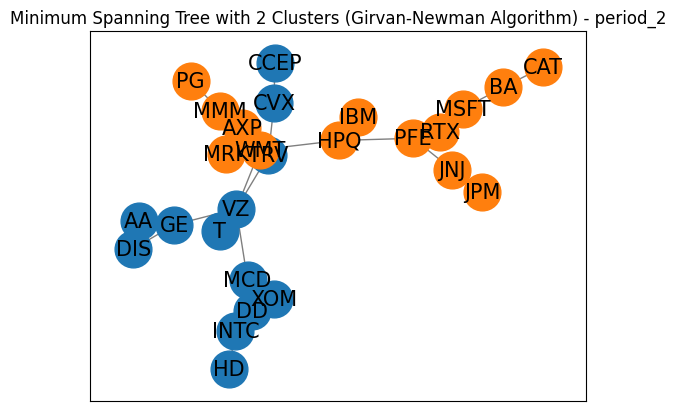

Metrics for period_2:
Cluster 1: Average Return = 0.0015, Standard Deviation = 0.0160, Sharpe Ratio = 0.0941
Cluster 2: Average Return = 0.0016, Standard Deviation = 0.0144, Sharpe Ratio = 0.1105
[('AA', 'AXP'), ('AA', 'BA'), ('AA', 'CAT'), ('AA', 'HPQ'), ('AA', 'IBM'), ('AA', 'JNJ'), ('AA', 'JPM'), ('AA', 'MMM'), ('AA', 'MRK'), ('AA', 'MSFT'), ('AA', 'PFE'), ('AA', 'PG'), ('AA', 'RTX'), ('AA', 'WMT'), ('CCEP', 'AXP'), ('CCEP', 'BA'), ('CCEP', 'CAT'), ('CCEP', 'HPQ'), ('CCEP', 'IBM'), ('CCEP', 'JNJ'), ('CCEP', 'JPM'), ('CCEP', 'MMM'), ('CCEP', 'MRK'), ('CCEP', 'MSFT'), ('CCEP', 'PFE'), ('CCEP', 'PG'), ('CCEP', 'RTX'), ('CCEP', 'WMT'), ('CVX', 'AXP'), ('CVX', 'BA'), ('CVX', 'CAT'), ('CVX', 'HPQ'), ('CVX', 'IBM'), ('CVX', 'JNJ'), ('CVX', 'JPM'), ('CVX', 'MMM'), ('CVX', 'MRK'), ('CVX', 'MSFT'), ('CVX', 'PFE'), ('CVX', 'PG'), ('CVX', 'RTX'), ('CVX', 'WMT'), ('DD', 'AXP'), ('DD', 'BA'), ('DD', 'CAT'), ('DD', 'HPQ'), ('DD', 'IBM'), ('DD', 'JNJ'), ('DD', 'JPM'), ('DD', 'MMM'), ('DD', 'MRK'), 

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


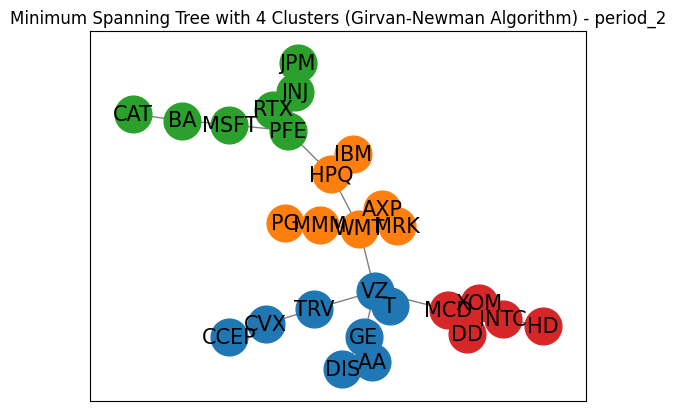

Metrics for period_2:
Cluster 1: Average Return = 0.0015, Standard Deviation = 0.0156, Sharpe Ratio = 0.0989
Cluster 2: Average Return = 0.0013, Standard Deviation = 0.0144, Sharpe Ratio = 0.0878
Cluster 3: Average Return = 0.0019, Standard Deviation = 0.0169, Sharpe Ratio = 0.1132
Cluster 4: Average Return = 0.0014, Standard Deviation = 0.0193, Sharpe Ratio = 0.0748
[('AA', 'AXP', 'BA', 'DD'), ('AA', 'AXP', 'BA', 'HD'), ('AA', 'AXP', 'BA', 'INTC'), ('AA', 'AXP', 'BA', 'MCD'), ('AA', 'AXP', 'BA', 'XOM'), ('AA', 'AXP', 'CAT', 'DD'), ('AA', 'AXP', 'CAT', 'HD'), ('AA', 'AXP', 'CAT', 'INTC'), ('AA', 'AXP', 'CAT', 'MCD'), ('AA', 'AXP', 'CAT', 'XOM'), ('AA', 'AXP', 'JNJ', 'DD'), ('AA', 'AXP', 'JNJ', 'HD'), ('AA', 'AXP', 'JNJ', 'INTC'), ('AA', 'AXP', 'JNJ', 'MCD'), ('AA', 'AXP', 'JNJ', 'XOM'), ('AA', 'AXP', 'JPM', 'DD'), ('AA', 'AXP', 'JPM', 'HD'), ('AA', 'AXP', 'JPM', 'INTC'), ('AA', 'AXP', 'JPM', 'MCD'), ('AA', 'AXP', 'JPM', 'XOM'), ('AA', 'AXP', 'MSFT', 'DD'), ('AA', 'AXP', 'MSFT', 'HD'), 

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


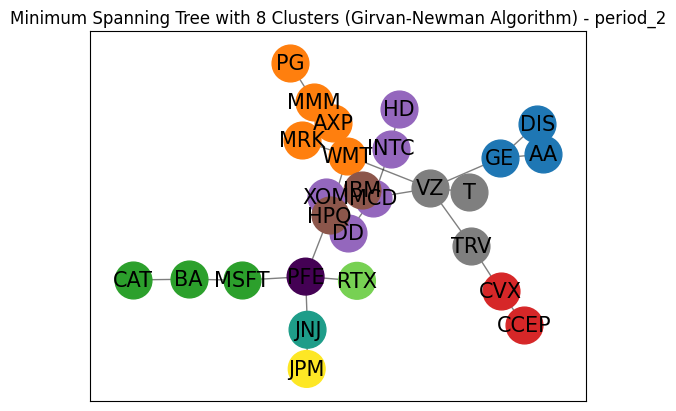

Metrics for period_2:
Cluster 1: Average Return = 0.0010, Standard Deviation = 0.0207, Sharpe Ratio = 0.0476
Cluster 2: Average Return = 0.0008, Standard Deviation = 0.0142, Sharpe Ratio = 0.0574
Cluster 3: Average Return = 0.0031, Standard Deviation = 0.0233, Sharpe Ratio = 0.1346
Cluster 4: Average Return = 0.0020, Standard Deviation = 0.0208, Sharpe Ratio = 0.0987
Cluster 5: Average Return = 0.0014, Standard Deviation = 0.0193, Sharpe Ratio = 0.0748
Cluster 6: Average Return = 0.0024, Standard Deviation = 0.0250, Sharpe Ratio = 0.0951
Cluster 7: Average Return = 0.0010, Standard Deviation = 0.0164, Sharpe Ratio = 0.0607
Cluster 8: Average Return = 0.0018, Standard Deviation = 0.0204, Sharpe Ratio = 0.0859
[('AA', 'AXP', 'MSFT', 'CCEP', 'DD', 'HPQ', 'RTX', 'VZ'), ('AA', 'AXP', 'MSFT', 'CCEP', 'DD', 'HPQ', 'RTX', 'T'), ('AA', 'AXP', 'MSFT', 'CCEP', 'DD', 'HPQ', 'RTX', 'TRV'), ('AA', 'AXP', 'MSFT', 'CCEP', 'DD', 'HPQ', 'PFE', 'VZ'), ('AA', 'AXP', 'MSFT', 'CCEP', 'DD', 'HPQ', 'PFE', 'T'

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


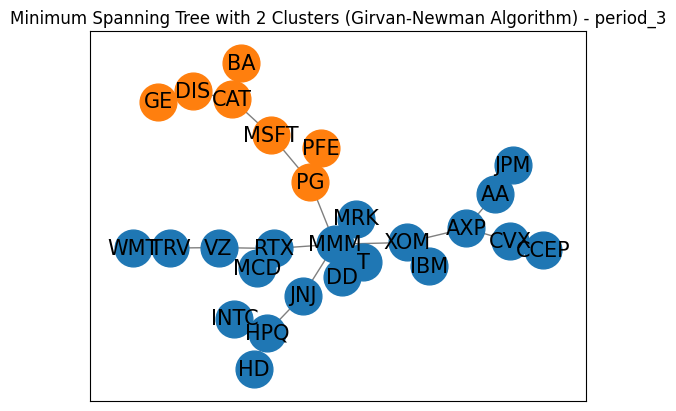

Metrics for period_3:
Cluster 1: Average Return = 0.0011, Standard Deviation = 0.0366, Sharpe Ratio = 0.0310
Cluster 2: Average Return = -0.0003, Standard Deviation = 0.0373, Sharpe Ratio = -0.0078
[('AA', 'BA'), ('AA', 'CAT'), ('AA', 'DIS'), ('AA', 'GE'), ('AA', 'MSFT'), ('AA', 'PFE'), ('AA', 'PG'), ('AXP', 'BA'), ('AXP', 'CAT'), ('AXP', 'DIS'), ('AXP', 'GE'), ('AXP', 'MSFT'), ('AXP', 'PFE'), ('AXP', 'PG'), ('CCEP', 'BA'), ('CCEP', 'CAT'), ('CCEP', 'DIS'), ('CCEP', 'GE'), ('CCEP', 'MSFT'), ('CCEP', 'PFE'), ('CCEP', 'PG'), ('CVX', 'BA'), ('CVX', 'CAT'), ('CVX', 'DIS'), ('CVX', 'GE'), ('CVX', 'MSFT'), ('CVX', 'PFE'), ('CVX', 'PG'), ('DD', 'BA'), ('DD', 'CAT'), ('DD', 'DIS'), ('DD', 'GE'), ('DD', 'MSFT'), ('DD', 'PFE'), ('DD', 'PG'), ('HD', 'BA'), ('HD', 'CAT'), ('HD', 'DIS'), ('HD', 'GE'), ('HD', 'MSFT'), ('HD', 'PFE'), ('HD', 'PG'), ('HPQ', 'BA'), ('HPQ', 'CAT'), ('HPQ', 'DIS'), ('HPQ', 'GE'), ('HPQ', 'MSFT'), ('HPQ', 'PFE'), ('HPQ', 'PG'), ('IBM', 'BA'), ('IBM', 'CAT'), ('IBM', 'DIS')

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


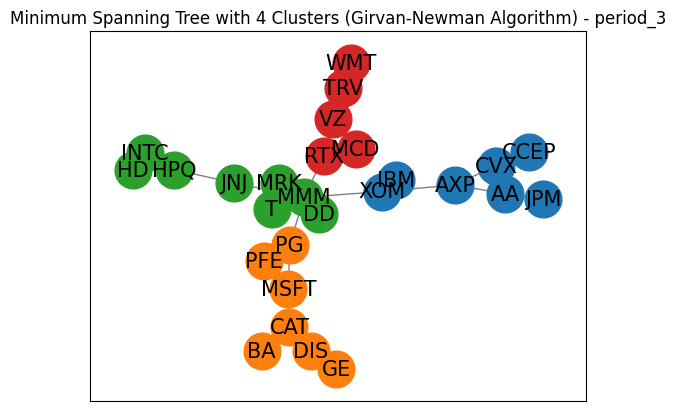

Metrics for period_3:
Cluster 1: Average Return = 0.0016, Standard Deviation = 0.0491, Sharpe Ratio = 0.0330
Cluster 2: Average Return = -0.0003, Standard Deviation = 0.0373, Sharpe Ratio = -0.0078
Cluster 3: Average Return = 0.0006, Standard Deviation = 0.0346, Sharpe Ratio = 0.0179
Cluster 4: Average Return = 0.0013, Standard Deviation = 0.0293, Sharpe Ratio = 0.0435
[('AA', 'BA', 'DD', 'MCD'), ('AA', 'BA', 'DD', 'RTX'), ('AA', 'BA', 'DD', 'TRV'), ('AA', 'BA', 'DD', 'VZ'), ('AA', 'BA', 'DD', 'WMT'), ('AA', 'BA', 'HD', 'MCD'), ('AA', 'BA', 'HD', 'RTX'), ('AA', 'BA', 'HD', 'TRV'), ('AA', 'BA', 'HD', 'VZ'), ('AA', 'BA', 'HD', 'WMT'), ('AA', 'BA', 'HPQ', 'MCD'), ('AA', 'BA', 'HPQ', 'RTX'), ('AA', 'BA', 'HPQ', 'TRV'), ('AA', 'BA', 'HPQ', 'VZ'), ('AA', 'BA', 'HPQ', 'WMT'), ('AA', 'BA', 'INTC', 'MCD'), ('AA', 'BA', 'INTC', 'RTX'), ('AA', 'BA', 'INTC', 'TRV'), ('AA', 'BA', 'INTC', 'VZ'), ('AA', 'BA', 'INTC', 'WMT'), ('AA', 'BA', 'JNJ', 'MCD'), ('AA', 'BA', 'JNJ', 'RTX'), ('AA', 'BA', 'JNJ', 

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


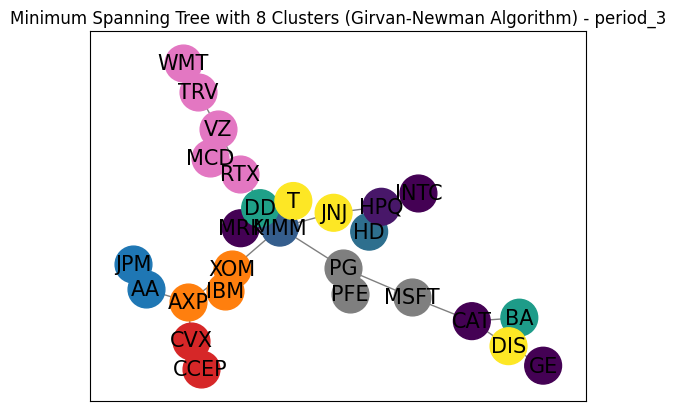

Metrics for period_3:
Cluster 1: Average Return = 0.0019, Standard Deviation = 0.0765, Sharpe Ratio = 0.0248
Cluster 2: Average Return = 0.0012, Standard Deviation = 0.0427, Sharpe Ratio = 0.0285
Cluster 3: Average Return = -0.0006, Standard Deviation = 0.0479, Sharpe Ratio = -0.0116
Cluster 4: Average Return = 0.0020, Standard Deviation = 0.0446, Sharpe Ratio = 0.0438
Cluster 5: Average Return = 0.0004, Standard Deviation = 0.0375, Sharpe Ratio = 0.0109
Cluster 6: Average Return = 0.0008, Standard Deviation = 0.0367, Sharpe Ratio = 0.0227
Cluster 7: Average Return = 0.0013, Standard Deviation = 0.0293, Sharpe Ratio = 0.0435
Cluster 8: Average Return = 0.0001, Standard Deviation = 0.0307, Sharpe Ratio = 0.0021
[('AA', 'AXP', 'GE', 'CCEP', 'MMM', 'HD', 'MCD', 'MSFT'), ('AA', 'AXP', 'GE', 'CCEP', 'MMM', 'HD', 'MCD', 'PFE'), ('AA', 'AXP', 'GE', 'CCEP', 'MMM', 'HD', 'MCD', 'PG'), ('AA', 'AXP', 'GE', 'CCEP', 'MMM', 'HD', 'RTX', 'MSFT'), ('AA', 'AXP', 'GE', 'CCEP', 'MMM', 'HD', 'RTX', 'PFE')

In [237]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from networkx.algorithms.community import girvan_newman
from itertools import product

def generate_portfolios(communities, labels):
    """Generate all possible portfolios from the clusters without repeating tickers."""
    stock_combinations = [list(labels[node] for node in community) for community in communities]
    return list(product(*stock_combinations))

for period_num, period in enumerate(['period_1', 'period_2', 'period_3'], start=1):
    # Convert the correlation matrix to a distance matrix
    distance_matrix = np.sqrt(2 * (1 - correlation_matrices[period]))
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}
    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Use the Girvan-Newman algorithm to find communities
    communities_generator = girvan_newman(G)
    nums_clusters = [2, 4, 8]  # Desired number of clusters
    for num_clusters in nums_clusters:
        for communities in communities_generator:
            if len(communities) == num_clusters:
                break

        # Plot the graph with clusters colored
        pos = nx.spring_layout(G)
        for i, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
        nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
        plt.title(f"Minimum Spanning Tree with {num_clusters} Clusters (Girvan-Newman Algorithm) - {period}")
        plt.show()
    # Print average returns, standard deviation, and Sharpe ratio for each cluster
        period_returns = period_dfs[period]
        print(f"Metrics for {period}:")
        for i, community in enumerate(communities):
            cluster_tickers = [labels[node] for node in community]
            cluster_returns = period_returns[cluster_tickers].mean(axis=1)
            average_return = cluster_returns.mean()
            std_dev = cluster_returns.std()
            sharpe_ratio = average_return / std_dev if std_dev != 0 else np.nan
            print(f"Cluster {i+1}: Average Return = {average_return:.4f}, Standard Deviation = {std_dev:.4f}, Sharpe Ratio = {sharpe_ratio:.4f}")
        

    # Generate all possible portfolios from the clusters without repeating tickers
        portfolios = generate_portfolios(communities, labels)
        print(portfolios)

    # Evaluate each portfolio in the following period
        if period_num < 4:  # Check if there is a following period
            following_period = f'period_{period_num + 1}'
            print(f"Evaluating Portfolios for {period} in {following_period}:")

            # Initialize lists to store portfolio metrics
            portfolio_returns = []
            portfolio_std_devs = []
            portfolio_sharpe_ratios = []

            for portfolio in portfolios:
                following_period_returns = period_dfs[following_period][list(portfolio)].mean(axis=1)
                average_return = following_period_returns.mean()
                std_dev = following_period_returns.std()
                sharpe_ratio = average_return / std_dev if std_dev != 0 else np.nan

                # Store the metrics for each portfolio
                portfolio_returns.append(average_return)
                portfolio_std_devs.append(std_dev)
                portfolio_sharpe_ratios.append(sharpe_ratio)

            # Calculate and report the overall statistics for all portfolios
            overall_average_return = np.mean(portfolio_returns)
            overall_std_dev = np.mean(portfolio_std_devs)
            overall_sharpe_ratio = np.mean(portfolio_sharpe_ratios)
            print(f"Overall Portfolio Metrics: Average Return = {overall_average_return:.4f}, Standard Deviation = {overall_std_dev:.4f}, Sharpe Ratio = {overall_sharpe_ratio:.4f}")

In [238]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from networkx.algorithms.community import girvan_newman

def generate_portfolios(communities, labels, num_portfolios=100):
    """Generate multiple portfolios by selecting one ticker at random from each cluster."""
    portfolios = []
    for _ in range(num_portfolios):
        portfolio = [random.choice(list([labels[node] for node in community])) for community in communities]
        portfolios.append(portfolio)
    return portfolios


results_by_period = {}

for period_num, period in enumerate(['period_1', 'period_2', 'period_3', 'period_4'], start=1):
    # Convert the correlation matrix to a distance matrix
    distance_matrix = np.sqrt(2 * (1 - correlation_matrices[period]))
    tickers = sorted(set(index[0] for index in distance_matrix))
    labels = {i: ticker for i, ticker in enumerate(tickers)}
    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Use the Girvan-Newman algorithm to find communities
    communities_generator = girvan_newman(G)
    nums_clusters = [2, 4, 8]  # Desired number of clusters
    for num_clusters in nums_clusters:
        for communities in communities_generator:
            if len(communities) == num_clusters:
                break

        # Generate multiple portfolios by selecting one ticker at random from each cluster
        portfolios = generate_portfolios(communities, labels)
        all_stocks = [stock for portfolio in portfolios for stock in portfolio]

        # Evaluate the portfolios in the current period
        portfolio_returns = []
        correlations = []
        stdev = []
        for portfolio in portfolios:
            current_period_returns = period_dfs[period][list(portfolio)].mean(axis=1)
            mean_portfolio_return = np.prod(1+current_period_returns)-1
            portfolio_returns.append(mean_portfolio_return)

            mean_std = (current_period_returns).std()
            stdev.append(mean_std)

            # Calculate correlation for the portfolio
            correlation_matrix = period_dfs[period][list(portfolio)].corr()
            upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
            upper_triangle_flat = upper_triangle.stack().dropna().values.tolist()
            mean_correlation = np.mean(upper_triangle_flat)
            correlations.append(mean_correlation)

        average_return = np.mean(portfolio_returns)
        mean_std = np.mean(stdev)
        sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(mean_std))
        average_correlation = np.mean(correlations)

        # Store the metrics for the portfolios
        results_by_period[f"{period} ({num_clusters} stocks)"] = {
            'Mean': average_return,
            'SD': mean_std,
            'Sharpe': sharpe_ratio,
            'Correlation': average_correlation,
            'Stocks': all_stocks
        }

# Convert the results to a DataFrame
result_df_mst = pd.DataFrame.from_dict(results_by_period, orient='index')
result_df_mst


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.026280,0.038157,0.068872,NaN,"[MMM, T, MSFT, GE, CCEP, HPQ, CAT, HPQ, RTX, H..."
period_1 (4 stocks),-0.014501,0.034125,-0.042493,NaN,"[MRK, BA, T, VZ, RTX, JNJ, INTC, DIS, MMM, JNJ..."
period_1 (8 stocks),0.036804,0.031395,0.117227,NaN,"[AXP, BA, CCEP, INTC, DIS, HPQ, VZ, MMM, AXP, ..."
period_2 (2 stocks),0.256487,0.022656,1.132105,NaN,"[HD, AXP, GE, MRK, DD, MSFT, CVX, AXP, VZ, RTX..."
period_2 (4 stocks),0.223077,0.018540,1.203191,NaN,"[T, MRK, BA, HD, CVX, HPQ, JNJ, INTC, T, PG, P..."
period_2 (8 stocks),0.277701,0.016045,1.730799,NaN,"[AA, PG, BA, CCEP, HD, IBM, JNJ, VZ, AA, AXP, ..."
period_3 (2 stocks),-0.060119,0.042325,-0.142041,NaN,"[IBM, GE, JNJ, MSFT, CCEP, GE, JPM, PFE, CVX, ..."
period_3 (4 stocks),0.008951,0.040192,0.022271,NaN,"[CCEP, DIS, INTC, VZ, AXP, CAT, MMM, TRV, JPM,..."
period_3 (8 stocks),0.019641,0.040099,0.048982,NaN,"[AA, AXP, GE, CCEP, MRK, HD, RTX, PFE, JPM, IB..."
period_4 (2 stocks),0.435170,0.027759,1.567660,NaN,"[HPQ, RTX, CCEP, MRK, DIS, MCD, HPQ, MSFT, JPM..."


In [239]:
def calculate_metrics_for_random_selection(period_dfs, num_stocks_list):
    results_by_period = {}
    num_portfolios = 100
 
    for period, returns_data in period_dfs.items():
        returns_data = returns_data.droplevel(1, axis=1)
        #print(returns_data)
        results_by_stocks = {}
        stocks_length_list = {}
        #print(returns_data)
        
        for num_stocks in num_stocks_list:
            std_returns = []
            portfolio_returns = []
            correlation = []
            selected_stocks_list = {}
            
            for _ in range(num_portfolios):
                selected_stocks = np.random.choice(returns_data.columns, size=num_stocks, replace=False)
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
               
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                
                mean_std = (portfolio_return_stocks).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlation.append(mean_correlation)
            
            #stocks_length_list[period] = selected_stocks_list
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            mean_correlations = np.mean(correlation)
            
            results_by_stocks[num_stocks] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correlations, "Stocks" : final_stocks_list}

        results_by_period[period] = results_by_stocks
    
    return results_by_period

num_stocks_list = [2, 4, 8]

results_by_period = calculate_metrics_for_random_selection(period_dfs, num_stocks_list)

dfs = []
for period, results_by_stocks in results_by_period.items():
    for num_stocks, metrics in results_by_stocks.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_stocks} stocks)"])
        dfs.append(df)

result_df_random = pd.concat(dfs)
result_df_random

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.020346,0.037615,0.072329,0.370978,"[MRK, AA, INTC, T, GE, JNJ, XOM, RTX, JPM, TRV..."
period_1 (4 stocks),0.044848,0.033202,0.137775,0.374634,"[HD, GE, VZ, XOM, INTC, CAT, TRV, RTX, MSFT, J..."
period_1 (8 stocks),0.039756,0.030563,0.134056,0.367378,"[MMM, MSFT, RTX, CVX, JNJ, HD, BA, CCEP, DD, C..."
period_2 (2 stocks),0.255131,0.021324,1.277692,0.226372,"[RTX, PG, MMM, DIS, JNJ, INTC, PG, AA, MSFT, P..."
period_2 (4 stocks),0.258088,0.018084,1.456126,0.252815,"[JNJ, AXP, RTX, T, DD, JPM, JNJ, HPQ, T, TRV, ..."
period_2 (8 stocks),0.234930,0.015945,1.486576,0.247287,"[INTC, VZ, MSFT, PG, BA, GE, PFE, JPM, INTC, G..."
period_3 (2 stocks),-0.054222,0.043259,-0.099151,0.506792,"[GE, JPM, CAT, INTC, INTC, BA, RTX, XOM, VZ, C..."
period_3 (4 stocks),-0.007252,0.039882,-0.008976,0.510459,"[CCEP, AA, HD, MCD, DIS, CAT, INTC, RTX, VZ, J..."
period_3 (8 stocks),0.007269,0.038339,0.024934,0.501779,"[MRK, JNJ, CAT, TRV, AXP, PFE, MCD, DD, IBM, D..."
period_4 (2 stocks),0.466899,0.025396,1.992755,0.470268,"[CVX, CAT, HD, XOM, CCEP, RTX, T, JPM, TRV, VZ..."


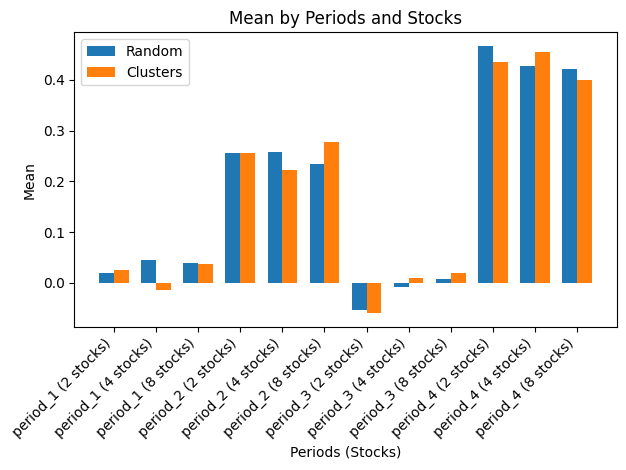

Total Average Mean of Random Values: 0.17613297868078356
Total Average Mean of Cluster Values: 0.17200792203872642

Period 1 Average Mean of Random Values: 0.03498342337305554
Period 1 Average Mean of Cluster Values: 0.016194091181656583
Period 2 Average Mean of Random Values: 0.24938296513021732
Period 2 Average Mean of Cluster Values: 0.25242160428928034
Period 3 Average Mean of Random Values: -0.01806838147509686
Period 3 Average Mean of Cluster Values: -0.010508595925228459


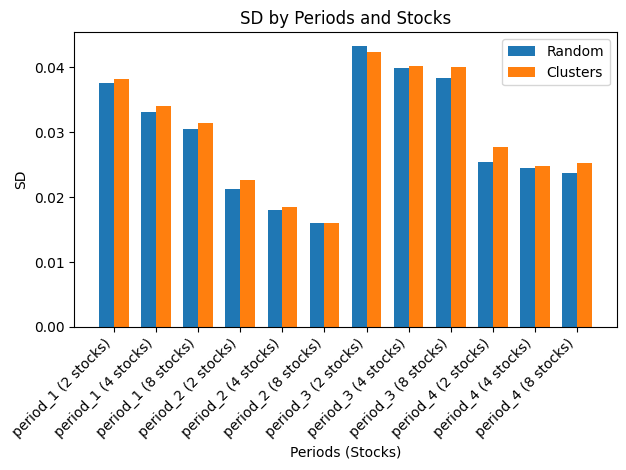

Total Average SD of Random Values: 0.029320130294473667
Total Average SD of Cluster Values: 0.03012125523710825

Period 1 Average SD of Random Values: 0.033793268730167615
Period 1 Average SD of Cluster Values: 0.034559158077132716
Period 2 Average SD of Random Values: 0.018451211517389588
Period 2 Average SD of Cluster Values: 0.0190802823232599
Period 3 Average SD of Random Values: 0.0404932157706914
Period 3 Average SD of Cluster Values: 0.040872013494081594


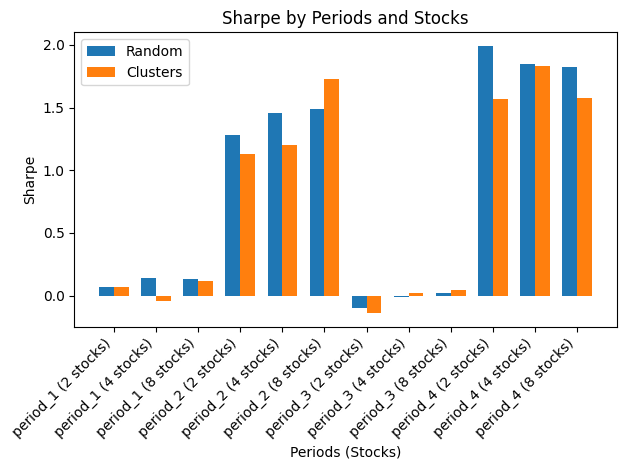

Total Average Sharpe of Random Values: 0.8452410089307097
Total Average Sharpe of Cluster Values: 0.7597247933321082

Period 1 Average Sharpe of Random Values: 0.11472006637948633
Period 1 Average Sharpe of Cluster Values: 0.04786897431113606
Period 2 Average Sharpe of Random Values: 1.4067976923666903
Period 2 Average Sharpe of Cluster Values: 1.3553650260595485
Period 3 Average Sharpe of Random Values: -0.027731192194460175
Period 3 Average Sharpe of Cluster Values: -0.023595518401255445


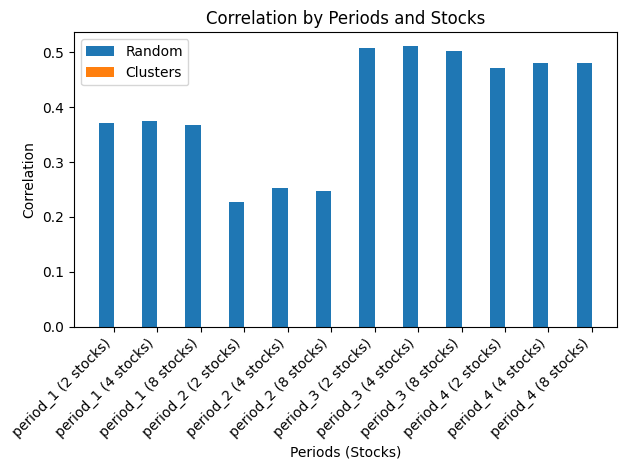

Total Average Correlation of Random Values: 0.3991227993453635
Total Average Correlation of Cluster Values: nan

Period 1 Average Correlation of Random Values: 0.37099658691740367
Period 1 Average Correlation of Cluster Values: nan
Period 2 Average Correlation of Random Values: 0.2421577083286692
Period 2 Average Correlation of Cluster Values: nan
Period 3 Average Correlation of Random Values: 0.5063436349558327
Period 3 Average Correlation of Cluster Values: nan


In [240]:
def plot_metric(metric_name):
    labels = list(result_df_random.index)
    
    random_values = [result_df_random.loc[label][metric_name] for label in labels]
    cluster_values = [result_df_mst.loc[label][metric_name] for label in labels]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, random_values, width, label='Random')
    rects2 = ax.bar([i + width for i in x], cluster_values, width, label='Clusters')

    ax.set_xlabel('Periods (Stocks)')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Periods and Stocks')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

    #print(random_values)
    #print(cluster_values)
    
    print("Total Average " + metric_name + " of Random Values:", np.mean(random_values))
    print("Total Average " + metric_name + " of Cluster Values:", np.mean(cluster_values))
    print()
    periods = ["Period 1", "Period 2", "Period 3"]  # Update with your periods
    for period_num, period_label in enumerate(periods, start=1):
        print(period_label + " Average " + metric_name + " of Random Values:", np.mean(random_values[(period_num - 1) * 3:period_num * 3]))
        print(period_label + " Average " + metric_name + " of Cluster Values:", np.mean(cluster_values[(period_num - 1) * 3:period_num * 3]))

# Plotting Mean
plot_metric('Mean')

# Plotting SD
plot_metric('SD')

# Plotting Sharpe
plot_metric('Sharpe')

# Plotting Correlation
plot_metric('Correlation')

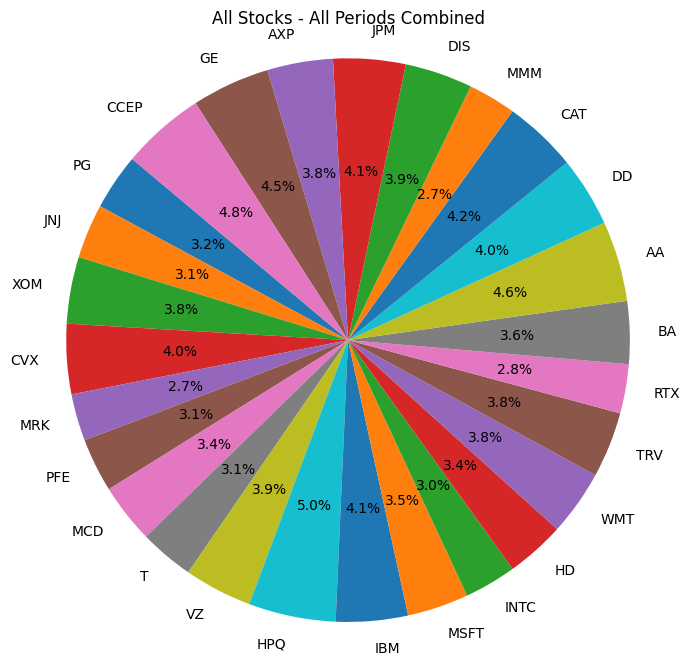

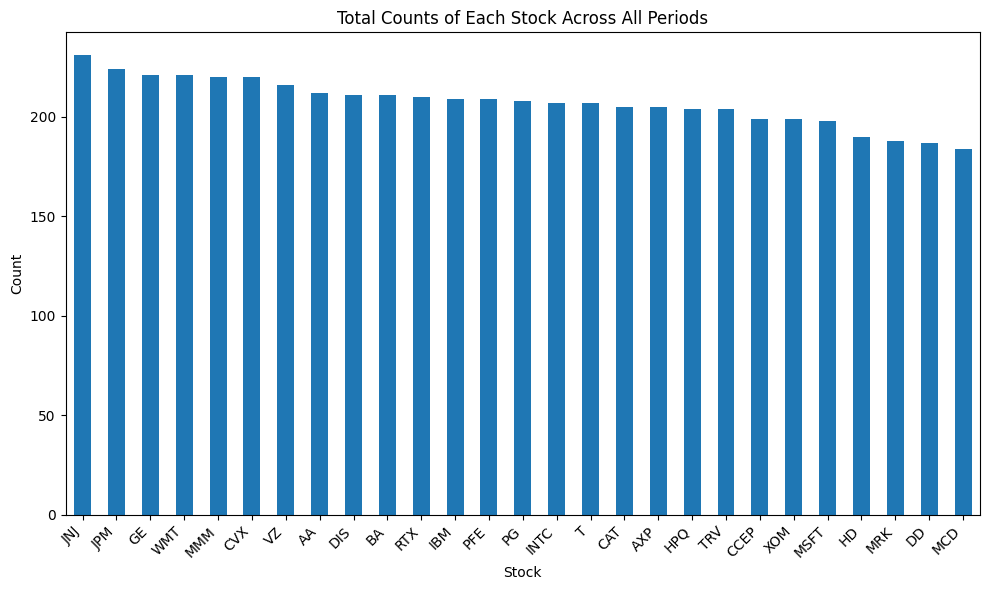

In [241]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_mst.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()